In [53]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [54]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [55]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [56]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.quarter, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,14971.2,68696.0,39698.0,53922.8,17584.0,0.1619,26344.5,0.9892,-1.2465,2.6516,39389.5
GDPDEF,33.0847,125.532,56.0893,84.6945,13.42,0.2146,20.9215,0.9892,-1.2062,1.6953,56.109
TB3MS,3.0645,15.05,4.1755,5.6525,0.01,0.828,1.78,0.9743,0.9389,1.3625,4.105
GS10,2.894,14.85,5.5547,7.35,0.65,0.8787,3.4925,0.9862,0.5021,1.9194,4.835
Price_10Y,1689.31,5588.73,1582.8,2728.29,103.357,0.8445,167.763,0.9917,-0.774,0.937,709.15
Stock_Price,1148.73,5446.68,866.909,1275.08,24.39,1.8788,92.9475,0.968,3.1993,0.7547,303.95
Dividend,18.1073,71.9758,16.6295,22.5067,1.4167,1.5043,3.1217,0.982,1.3175,0.9184,9.7683
E,47.1315,197.883,39.71,57.8683,2.4567,1.6451,5.7475,0.9756,2.1096,0.8425,16.5717
CAPE,8.0844,43.2083,20.7779,25.9245,6.6434,0.4983,15.1349,0.9784,-0.1175,2.5701,20.3851


nothing

In [57]:
data_source[:GDPDEF]

286×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1953-04-01 to 2024-07-01
┌────────────┬─────────┐
│            │ GDPDEF  │
├────────────┼─────────┤
│ 1953-04-01 │   13.42 │
│ 1953-07-01 │  13.476 │
│ 1953-10-01 │  13.501 │
│ 1954-01-01 │  13.544 │
│ 1954-04-01 │  13.556 │
│ 1954-07-01 │  13.574 │
│ 1954-10-01 │  13.611 │
│ 1955-01-01 │  13.675 │
│     ⋮      │    ⋮    │
│ 2023-01-01 │ 121.251 │
│ 2023-04-01 │ 121.804 │
│ 2023-07-01 │ 122.768 │
│ 2023-10-01 │ 123.241 │
│ 2024-01-01 │ 124.163 │
│ 2024-04-01 │ 124.943 │
│ 2024-07-01 │ 125.532 │
└────────────┴─────────┘
        271 rows omitted

In [58]:
freq = 1

cpi = (log.(data_source[:GDPDEF]) .- lag(log.(data_source[:GDPDEF]),4)) .* 100 
gdp = (log.(data_source[:A939RX0Q048SBEA]) .- lag(log.(data_source[:A939RX0Q048SBEA]),4)) .* 100 
sr = (data_source[:TB3MS]) .- cpi
term = (data_source[:GS10]) .- (data_source[:TB3MS])
Δd = (log.(data_source[:Dividend]) .- lag(log.(data_source[:Dividend]),4)) .* 100 .- cpi
dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA_A939RX0Q048SBEA,1.9201,11.4109,1.7029,2.8079,-8.2584,-0.8873,1.0132,0.6838,8.7904,0.8869,1.8675
GDPDEF_GDPDEF,1.1793,7.4709,2.3319,2.7695,0.1153,1.7607,1.6577,0.9458,4.7314,1.9773,2.0521
TB3MS_GDPDEF_GDPDEF,2.4086,4.7148,0.8506,3.1995,-6.4539,-0.4414,-0.9039,0.9656,-0.1208,0.3531,0.6274
GS10_TB3MS,1.2048,3.7,1.6401,2.655,-1.48,-0.299,0.74,0.9159,-0.6069,1.3614,1.65
Dividend_Dividend_GDPDEF_GDPDEF,6.226,14.51,3.3882,7.6768,-23.0477,-1.3765,0.8797,0.9518,3.7815,0.5442,3.5987
Dividend_Stock_Price,0.3208,-3.17,-3.8762,-3.595,-4.5,0.3421,-4.095,0.9538,-0.6936,-12.0821,-3.93


nothing

6×6 Matrix{Float64}:
  1.0        0.262863    0.122466    -0.101136   0.107813    -0.174588
  0.262863   1.0        -0.143025    -0.217046   0.0864797    0.0701478
  0.122466  -0.143025    1.0         -0.23493   -0.00638544   0.355108
 -0.101136  -0.217046   -0.23493      1.0       -0.262198     0.402236
  0.107813   0.0864797  -0.00638544  -0.262198   1.0          0.0804026
 -0.174588   0.0701478   0.355108     0.402236   0.0804026    1.0

In [104]:
s_data[:GDPDEF_GDPDEF]

159×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1985-01-01 to 2024-07-01
┌────────────┬───────────────┐
│            │ GDPDEF_GDPDEF │
├────────────┼───────────────┤
│ 1985-01-01 │       3.46524 │
│ 1985-04-01 │       3.25498 │
│ 1985-07-01 │        2.9721 │
│ 1985-10-01 │       2.78471 │
│ 1986-01-01 │       2.29697 │
│ 1986-04-01 │       2.03333 │
│ 1986-07-01 │       1.84041 │
│ 1986-10-01 │       1.82644 │
│     ⋮      │       ⋮       │
│ 2023-01-01 │       5.18964 │
│ 2023-04-01 │       3.40108 │
│ 2023-07-01 │        3.0694 │
│ 2023-10-01 │       2.53426 │
│ 2024-01-01 │       2.37324 │
│ 2024-04-01 │       2.54444 │
│ 2024-07-01 │       2.22643 │
└────────────┴───────────────┘
              144 rows omitted

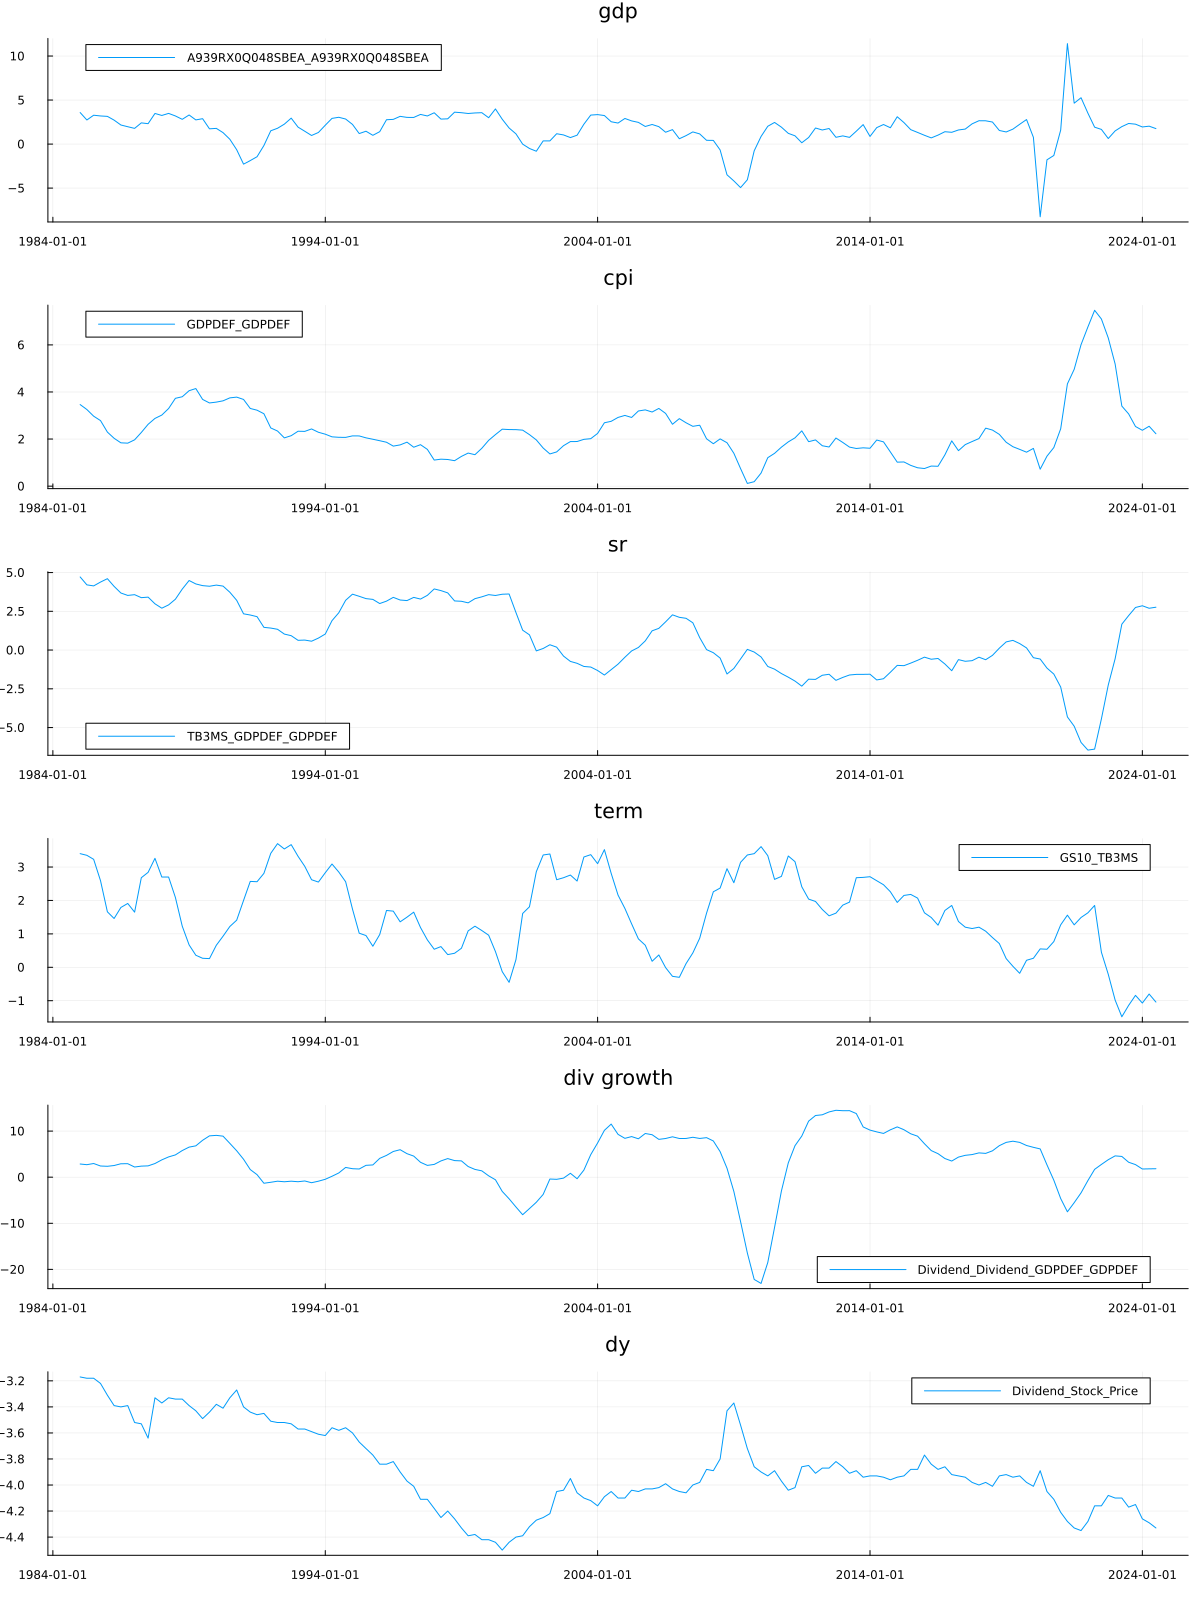

In [60]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [61]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,A939RX0Q048SBEA_A939RX0Q048SBEA,GDPDEF_GDPDEF,TB3MS_GDPDEF_GDPDEF,GS10_TB3MS,Dividend_Dividend_GDPDEF_GDPDEF,Dividend_Stock_Price,std
A939RX0Q048SBEA_A939RX0Q048SBEA,-2.297,0.6676,-0.0164,0.0771,0.1442,-0.0103,-0.6766,1.4009
GDPDEF_GDPDEF,0.1404,0.0637,0.9167,-0.0326,0.0106,-0.0117,0.0033,0.3485
TB3MS_GDPDEF_GDPDEF,-0.5543,-0.0142,0.1546,0.986,0.0229,0.0162,-0.0321,0.496
GS10_TB3MS,0.4161,-0.0514,-0.0635,0.004,0.9132,-0.0076,0.0109,0.3981
Dividend_Dividend_GDPDEF_GDPDEF,-2.97,0.4756,0.1439,-0.109,0.3033,0.951,-0.4062,1.6254
Dividend_Stock_Price,-0.4505,-0.0016,0.0179,0.0041,0.0238,0.003,0.9094,0.0663


,A939RX0Q048SBEA_A939RX0Q048SBEA,GDPDEF_GDPDEF,TB3MS_GDPDEF_GDPDEF,GS10_TB3MS,Dividend_Dividend_GDPDEF_GDPDEF,Dividend_Stock_Price
A939RX0Q048SBEA_A939RX0Q048SBEA,1.0,0.4,-0.04,-0.07,0.02,-0.3
GDPDEF_GDPDEF,0.4,1.0,-0.62,0.17,-0.12,-0.05
TB3MS_GDPDEF_GDPDEF,-0.04,-0.62,1.0,-0.51,0.05,-0.17
GS10_TB3MS,-0.07,0.17,-0.51,1.0,0.02,0.17
Dividend_Dividend_GDPDEF_GDPDEF,0.02,-0.12,0.05,0.02,1.0,0.13
Dividend_Stock_Price,-0.3,-0.05,-0.17,0.17,0.13,1.0


In [96]:
freq = 4
scenarios = simulate(model, 25*freq, 10_000)
#periods = [2,6, 16, 26]
periods_years = [1,5, 15, 25]

scenarios_years = scenarios[:,periods.*freq.+1,:]



6×4×10000 Array{Float64, 3}:
[:, :, 1] =
  0.797067  -0.18219    2.38609    0.827901
  1.76897    1.17728    2.43879    0.461034
  0.666552   2.82821   -1.30675    2.06616
  0.450496  -0.506686   0.697506   0.897566
 -1.83823    3.2934    -1.37024   17.8834
 -4.2694    -4.23474   -4.38118   -3.87006

[:, :, 2] =
  3.15618    0.771337   0.419849   4.72553
  1.46856    0.400177   3.3617     3.69512
  1.19839    1.31414   -0.122033   3.85761
  0.691338   1.65146    0.134176  -1.19053
 -3.59652   -5.39846   -0.320341   4.89736
 -4.48161   -4.67672   -4.12146   -4.62505

[:, :, 3] =
  1.11993    -1.45092   4.89492   -0.0880042
  1.73004     2.41485   5.37576    2.88518
  1.82773     3.11069  -0.694758   0.14229
  0.83997     1.75899   0.469574   1.59054
  0.0955779  12.7001    5.37152   -3.64451
 -4.1886     -3.89778  -4.28009   -4.11109

;;; … 

[:, :, 9998] =
  2.62165    1.80448   1.93448    1.22049
  2.6669     2.30171   3.08063    1.23411
  1.61346    1.54074  -0.135144   0.364086
  0.

In [92]:
percentile(scenarios[3,5,:], [.25,.5,.75])

3-element Vector{Float64}:
 -0.30096046091710565
 -0.07601978157906791
  0.055493701753514424

In [126]:
cpi = cumsum(scenarios[2,2:4:101,:],dims=1)[periods_years,:] ./periods_years
sr = scenarios[2,:,:] + scenarios[3,:,:]
lr = scenarios[2,:,:] + scenarios[3,:,:] + scenarios[4,:,:]
Δd = scenarios[2,:,:] + scenarios[5,:,:]
Δd_cum = cumsum(Δd[2:4:101,:],dims=1)[periods_years,:] ./periods_years
dy = exp.(scenarios[6, :,:])
eq_return = calculate_equity_returns(Δd, scenarios[6, :,:])
eq_return_cum = cumsum(eq_return[2:4:101,:],dims=1)[periods_years,:] ./periods_years
real_eq_return = eq_return[1:4:100,:] .- scenarios[2,1:4:100,:] 
real_eq_return_cum = cumsum(real_eq_return, dims=1)[periods_years,:] ./periods_years
bond_returns = calculate_bond_returns(lr[1:4:101,:]./100, 10, 1)
bond_cum_returns = cumsum(bond_returns, dims=1)[periods_years,:] ./ periods_years


periods = periods_years.*freq.+1

print_scenarios_percentiles(cpi, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "cpi")
print_scenarios_percentiles(sr[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "sr")
print_scenarios_percentiles(lr[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "lr")
print_scenarios_percentiles(Δd_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "div growth")
print_scenarios_percentiles(dy[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "dy")
print_scenarios_percentiles(eq_return_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity")
print_scenarios_percentiles(real_eq_return_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "real equity")
print_scenarios_percentiles(bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "bonds")


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.3396,1.4726,1.5868,1.9242,2.1614,2.3938,2.7235,2.833,2.9653
5,0.8709,1.0843,1.2674,1.888,2.3254,2.7434,3.3349,3.52,3.7812
10,1.1216,1.3141,1.4758,1.9992,2.3508,2.7043,3.1961,3.3488,3.5265
25,1.292,1.4677,1.6006,2.03,2.3334,2.6317,3.0605,3.1929,3.3485


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.327,2.6255,2.8841,3.697,4.276,4.8256,5.6217,5.8944,6.1962
5,-0.6951,-0.0409,0.4893,2.327,3.6134,4.8368,6.5742,7.1352,7.7686
10,-2.0762,-1.3058,-0.5789,1.484,2.8707,4.2967,6.307,6.9583,7.6435
25,-2.4009,-1.5762,-0.8738,1.2214,2.6375,4.0481,6.1505,6.7793,7.6266


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.2322,2.507,2.7471,3.5173,4.0293,4.5501,5.2781,5.5095,5.8054
5,0.978,1.5495,1.9712,3.306,4.2441,5.1699,6.4972,6.9252,7.3765
10,0.2506,0.792,1.3438,2.8954,3.9754,5.0729,6.6195,7.0827,7.6878
25,0.099,0.6485,1.2156,2.7628,3.8575,4.9371,6.4767,6.9976,7.6515


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.5359,0.1358,0.6232,2.1561,3.2588,4.3202,5.8851,6.3547,6.9255
5,-4.9214,-3.6864,-2.5833,0.8657,3.221,5.6483,9.1131,10.228,11.7212
10,-0.8648,0.0876,0.894,3.4833,5.2841,7.1028,9.6822,10.4447,11.4807
25,0.3836,1.2738,1.9426,4.138,5.7172,7.1876,9.4245,10.1577,10.9599


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.009,0.0094,0.0097,0.011,0.012,0.0131,0.0147,0.0153,0.0161
5,0.0071,0.0079,0.0085,0.011,0.0132,0.0158,0.0203,0.0221,0.0243
10,0.0081,0.0091,0.0099,0.0133,0.0164,0.0199,0.0267,0.0291,0.0327
25,0.0083,0.0093,0.0103,0.0138,0.0169,0.0207,0.0278,0.0304,0.0338


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.0895,-0.0654,-0.0454,0.0188,0.0648,0.1097,0.1728,0.1936,0.2173
5,-0.0553,-0.0391,-0.0254,0.0161,0.046,0.076,0.1199,0.1347,0.151
10,-0.0066,0.0047,0.0134,0.0436,0.0648,0.0856,0.1149,0.1242,0.1353
25,0.0103,0.0192,0.028,0.0531,0.0704,0.0876,0.112,0.1197,0.1293


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-2.3057,-2.2811,-2.2602,-2.1968,-2.1524,-2.1085,-2.0441,-2.0251,-2.0009
5,-3.6211,-3.3812,-3.2097,-2.6562,-2.2666,-1.8689,-1.2921,-1.115,-0.8832
10,-3.4748,-3.296,-3.1393,-2.6424,-2.2877,-1.9321,-1.4079,-1.242,-1.0577
25,-3.2996,-3.1444,-3.0074,-2.5647,-2.2645,-1.9554,-1.5188,-1.3735,-1.2049


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.0891,-0.07,-0.0547,-0.0044,0.0336,0.0726,0.1348,0.1551,0.1789
5,0.0031,0.0082,0.0127,0.0271,0.0373,0.0488,0.0662,0.0722,0.0791
10,0.023,0.026,0.0286,0.0368,0.0424,0.0482,0.0567,0.0594,0.0629
25,0.0234,0.0263,0.0289,0.0365,0.0419,0.0475,0.0552,0.0574,0.0602


In [128]:
mdd, mddl = max_drawdown_and_length(eq_return)

display(" equity")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

" equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.0694464  0.151851  0.248059  0.400948  0.698929

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 3.0  8.0  14.0  21.0  44.0

In [129]:
B = collect(model.C[2:end,:]')

resp = girf(B, model.Σ, 8, 2)

plot(resp; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

MethodError: MethodError: no method matching girf(::Matrix{Float64}, ::Matrix{Float64}, ::Int64, ::Int64)
The function `girf` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  girf(::Matrix{Float64}, ::Matrix{Float64}, ::Int64, ::Int64, !Matched::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\VARs\utils.jl:213


In [70]:
display(exp(-3.8 ) *100) 
display(exp(-3.8 + 0.08)*100) 
display((exp(-3.8 ) - exp(-3.8 + 0.08))*100) 
display(0.0224*exp((0.06^2)-1)^.5 *100)
display(exp(-4.8 ) *100) 

2.23707718561656

2.4233967845691122

-0.1863195989525522

1.3610764116758998

0.822974704902003

IRF returns
- estimate dy, and div idnex, based on initial value, mean?
- estimate returns?
- 

In [71]:
resp

UndefVarError: UndefVarError: `resp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [72]:
real_Δd = resp[:,2] + resp[:,5]




UndefVarError: UndefVarError: `resp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [73]:
dy = exp.(scenarios[6, :,:])

101×10000 Matrix{Float64}:
 0.0131675  0.0131675   0.0131675   …  0.0131675   0.0131675   0.0131675
 0.0137132  0.0128245   0.0134341      0.0127754   0.0123875   0.0112503
 0.0120884  0.0122434   0.0142979      0.0117169   0.0114885   0.0102997
 0.010955   0.0114837   0.0146029      0.0112759   0.011227    0.0120882
 0.0098465  0.0105797   0.0138328      0.0104065   0.00901267  0.0120558
 0.0105155  0.00962165  0.0144493   …  0.0114044   0.00812787  0.0121634
 0.0113252  0.0094621   0.014812       0.0110193   0.00929217  0.0124813
 0.0115927  0.0101374   0.0151795      0.0107443   0.00912406  0.0104468
 0.0115119  0.0108941   0.0149788      0.0104201   0.00806053  0.0107741
 0.0132783  0.00975223  0.0144262      0.00876535  0.00763714  0.00919818
 ⋮                                  ⋱                          
 0.021671   0.0206678   0.00781586     0.0195849   0.0258567   0.017715
 0.0211396  0.0192835   0.00758648     0.0189206   0.0263342   0.0189808
 0.0224599  0.019142    0.0071805